## DAFTAR ISI

• Perkenalan.<br>
• Analisis data dan visualisasi data.<br>
• Kesimpulan:<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Rangkuman.<br>
&nbsp;&nbsp;&nbsp;&nbsp;- Key insights / wawasan.

#  Perkenalan

PT.ABC adalah perusahaan yang bergerak dalam bidang taksi online. PT.ABC memiliki aplikasi pemesanan taksi online dimana client dapat mengorder taxi dan driver dapat menerima ataupun menolak pesanan. Cara kerja aplikasinya adalah sesaat setelah client memencet order, maka system akan mencari driver dan membuat penawaran pesanan kepada driver tersebut. Dalam tugas kali ini, kita disuruh untuk melakukan investigasi / analisa data terhadap data failed orders. Failed orders adalah pesanan gagal dimana setelah client memencet tombol order namun pada akhirnya tidak berhasil naik ke mobil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data
data = pd.read_csv("dataorders.csv", delimiter=';')

In [3]:
#Melihat data
data.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-9.789160e-01,51456173,60.0,3000580000000,4,1,198.0
1,20:57:32,-9.503850e-01,51456843,NaN,3000580000000,4,0,128.0
2,12:07:50,-9.695200e-01,51455544,477.0,3000580000000,4,1,46.0
3,13:50:20,-1.054671e+06,51460544,658.0,3000580000000,4,1,62.0
4,21:24:45,-9.676050e-01,51458236,NaN,3000580000000,9,0,NaN


Penjelasan kolom:<br>
1.order_datetime = waktu pemesanan.<br>
2.origin_longitude = posisi longitude pemesanan.<br>
3.origin_latitude = posisi latitude pemesanan.<br>
4.m_order_eta = estimasi tiba waktu supir ke client.<br>
5.orer_gk = nomor pemesanan.<br>
6.order_status_key = status pesanan, jika nilai = 4 maka orderan dicancel oleh client, jika value = 9, maka orderan dicancel oleh sistem.<br>
7.is_driver_assigned_key = status apakah terdapat driver atau tidak. Jika nilai 1 artinya True, jika nilai 0 artinya False.<br>
8.cancellation_time_in_seconds = rentan waktu dalam detik dari pemesanan sampai pembatalan pesanan.

# Analisis data & visualisasi data

In [4]:
#Rename nama dan value kolom order_status_key dan is_driver_assigned_key agar data lebih mudah dilihat dan dipahami.
data['Status_order'] = data.apply(lambda x: 'Client cancel' if (x['order_status_key'] == 4) else 'System cancel',axis=1)
data['Driver'] = data.apply(lambda x: 'No' if (x['is_driver_assigned_key'] == 0) else 'Yes',axis=1)
data.drop(columns=['order_status_key','is_driver_assigned_key'], inplace=True)

In [5]:
#Data wrangling, mengecek apakah tipe data sudah sesuai atau belum.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  int64  
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   cancellations_time_in_seconds  7307 non-null   float64
 6   Status_order                   10716 non-null  object 
 7   Driver                         10716 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 669.9+ KB


In [6]:
#Mengubah tipe data
data['order_datetime'] = pd.to_datetime(data['order_datetime'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 10716 non-null  datetime64[ns]
 1   origin_longitude               10716 non-null  float64       
 2   origin_latitude                10716 non-null  int64         
 3   m_order_eta                    2814 non-null   float64       
 4   order_gk                       10716 non-null  int64         
 5   cancellations_time_in_seconds  7307 non-null   float64       
 6   Status_order                   10716 non-null  object        
 7   Driver                         10716 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 669.9+ KB


In [8]:
#Membuat variable untuk menampung data khusus 'Client cancel'
dataclient = data[data['Status_order'] == 'Client cancel']
dataclient

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,Status_order,Driver
0,2022-11-22 18:08:07,-9.789160e-01,51456173,60.0,3000580000000,198.0,Client cancel,Yes
1,2022-11-22 20:57:32,-9.503850e-01,51456843,NaN,3000580000000,128.0,Client cancel,No
2,2022-11-22 12:07:50,-9.695200e-01,51455544,477.0,3000580000000,46.0,Client cancel,Yes
3,2022-11-22 13:50:20,-1.054671e+06,51460544,658.0,3000580000000,62.0,Client cancel,Yes
9,2022-11-22 06:33:52,-9.762160e-01,51433202,NaN,3000580000000,78.0,Client cancel,No
...,...,...,...,...,...,...,...,...
10711,2022-11-22 13:11:35,-9.753720e-01,51457846,NaN,3000600000000,36.0,Client cancel,No
10712,2022-11-22 13:13:55,-9.753720e-01,51457846,NaN,3000600000000,4.0,Client cancel,No
10713,2022-11-22 13:17:21,-9.729260e-01,51457693,60.0,3000600000000,34.0,Client cancel,Yes
10714,2022-11-22 13:16:28,-9.753720e-01,51457846,NaN,3000600000000,6.0,Client cancel,No


In [9]:
#Membuat variable untuk menampung data khusus 'Client cancel' dan 'No driver'
datacancelnodriver = dataclient[dataclient['Driver'] == 'No']
datacancelnodriver.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds
count,4.496000e+03,4.496000e+03,0.0,4.496000e+03,4496.000000
mean,-5.690012e+04,5.145085e+07,NaN,3.000599e+12,110.371441
std,2.340601e+05,1.181445e+04,NaN,2.328316e+07,120.676021
min,-1.066952e+06,5.139952e+07,NaN,3.000550e+12,3.000000
25%,-9.741632e-01,5.144483e+07,NaN,3.000580e+12,38.000000
50%,-9.668950e-01,5.145249e+07,NaN,3.000600e+12,88.000000
75%,-9.500120e-01,5.145684e+07,NaN,3.000620e+12,157.000000
max,-8.670880e-01,5.149617e+07,NaN,3.000630e+12,4097.000000


In [10]:
#Membuat outliers
Q3 = datacancelnodriver['cancellations_time_in_seconds'].quantile(0.75)
Q1 = datacancelnodriver['cancellations_time_in_seconds'].quantile(0.25)
upperlim = Q3 + (1.5 * Q3)
lowerlim = Q1 - (1.5 * Q1)
datacancelnodriver = datacancelnodriver[(datacancelnodriver['cancellations_time_in_seconds'] < upperlim) & (datacancelnodriver['cancellations_time_in_seconds'] > lowerlim)]
datacancelnodriver.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds
count,4.429000e+03,4.429000e+03,0.0,4.429000e+03,4429.000000
mean,-5.730302e+04,5.145084e+07,NaN,3.000599e+12,101.277263
std,2.348440e+05,1.180077e+04,NaN,2.327889e+07,76.120951
min,-1.066952e+06,5.139952e+07,NaN,3.000550e+12,3.000000
25%,-9.741790e-01,5.144482e+07,NaN,3.000580e+12,38.000000
50%,-9.669280e-01,5.145251e+07,NaN,3.000600e+12,86.000000
75%,-9.500600e-01,5.145684e+07,NaN,3.000620e+12,153.000000
max,-8.670880e-01,5.149617e+07,NaN,3.000630e+12,388.000000


Pembahasan cancellations_time_in_seconds :Setelah kita membuang outliers pada data diatas, nilai mean dan mediannya masih terpaut cukup jauh. Bisa disimpulkan bahwa distribusi data tersebut tidak simetris, maka untuk menentukan central tendency atau rata-ratanya kita menggunakan nilai median yaitu 86 detik atau 1.5 menit.

Rata-rata order dicancel oleh user sekitar 86 detik dari pemesanan order dikarenakan tidak dapat driver.Jumlah orderan pada kategori ini adalah : 4429 orderan 

In [11]:
#Membuat variable untuk menampung data khusus 'Client cancel' dan 'Yes driver'
datacancelwithdriver = dataclient[dataclient['Driver'] == 'Yes']
datacancelwithdriver.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds
count,2.811000e+03,2.811000e+03,2811.000000,2.811000e+03,2811.000000
mean,-3.369679e+04,5.145009e+07,441.610459,3.000594e+12,233.897901
std,1.822221e+05,1.112301e+04,288.057123,2.565912e+07,292.709718
min,-1.060767e+06,5.140007e+07,60.000000,3.000550e+12,6.000000
25%,-9.736505e-01,5.144482e+07,233.000000,3.000580e+12,54.000000
50%,-9.660620e-01,5.145180e+07,372.000000,3.000590e+12,127.000000
75%,-9.498240e-01,5.145617e+07,653.500000,3.000620e+12,296.000000
max,-8.764920e-01,5.149475e+07,1559.000000,3.000630e+12,4303.000000


In [12]:
#Membuang outliers
Q3 = datacancelwithdriver['cancellations_time_in_seconds'].quantile(0.75)
Q1 = datacancelwithdriver['cancellations_time_in_seconds'].quantile(0.25)
upperlim = Q3 + (1.5 * Q3)
lowerlim = Q1 - (1.5 * Q1)
datacancelwithdriver = datacancelwithdriver[(datacancelwithdriver['cancellations_time_in_seconds'] < upperlim) & (datacancelwithdriver['cancellations_time_in_seconds'] > lowerlim)]
datacancelwithdriver.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds
count,2.644000e+03,2.644000e+03,2644.000000,2.644000e+03,2644.000000
mean,-2.965714e+04,5.145029e+07,438.811649,3.000594e+12,180.639939
std,1.712899e+05,1.088942e+04,288.730949,2.565381e+07,172.725964
min,-1.060767e+06,5.140007e+07,60.000000,3.000550e+12,6.000000
25%,-9.735050e-01,5.144492e+07,179.750000,3.000580e+12,50.750000
50%,-9.662765e-01,5.145198e+07,359.000000,3.000590e+12,114.000000
75%,-9.499750e-01,5.145617e+07,653.000000,3.000620e+12,251.000000
max,-8.764920e-01,5.149475e+07,1559.000000,3.000630e+12,737.000000


Pembahasan cancellations_time_in_seconds :Setelah kita membuang outliers pada data diatas, nilai mean dan mediannya masih terpaut cukup jauh. Bisa disimpulkan bahwa distribusi data tersebut tidak simetris, maka untuk menentukan central tendency atau rata-ratanya kita menggunakan nilai median yaitu 114 detik atau hampir 2 menit. Next, mari kita analisa nilai dari m_order_eta.<br>
Pembahasan m_order_eta: Nilai mean dan median masih cukup jauh bahkan setelah kita membuang outliers. Jadi data central tendency atau rata rata yang akan kita ambil adalah nilai mediannya yaitu 359 detik.

Rata rata order dicancel oleh user karena waktu estimasi driver tiba adalah 359 detik. Jumlah orderan pada kategori ini adalah 2644 orderan

Karena data rentan waktu dari order sampai mendapatkan driver tidak diinfokan, maka kita bisa menganggap data diatas bahwa user mencancel orderan sesaat setelah mendapat driver. Rata-rata cancellation time ada diangka 114 detik, jika kita bisa menurunkan angka ini sampai disekitar 90 detik, maka kita bisa meningkatkan peluang penurunan cancel order yang disebabkan karena tidak dapat supir. Jumlah perbandingan orderan cancel tidak dapat supir dengan orderan cancel karena waktu arrival yang lama juga lebih banyak yaitu 4429 : 2644 orderan.

##### NOTE : Berdasarkan penjelasan diatas, maka analisis kedepannya semua  yang membutuhkan nilai rata-rata akan dihitung menggunakan median.

In [13]:
#Membuat variable untuk menampung data khusus 'System cancel'
datasystemcanc = data[data['Status_order'] == 'System cancel']
print("Bisa dilihat bahwa cancellations_time_in_seconds tidak mengandung nilai apapun karena orderan di batalkan oleh sistem")
datasystemcanc

Bisa dilihat bahwa cancellations_time_in_seconds tidak mengandung nilai apapun karena orderan di batalkan oleh sistem


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,Status_order,Driver
4,2022-11-22 21:24:45,-9.676050e-01,51458236,NaN,3000580000000,NaN,System cancel,No
5,2022-11-22 21:21:23,-9.470110e-01,51456380,NaN,3000580000000,NaN,System cancel,No
6,2022-11-22 07:58:15,-9.556370e-01,51470372,NaN,3000580000000,NaN,System cancel,No
7,2022-11-22 07:53:46,-9.782300e-01,51454575,NaN,3000580000000,NaN,System cancel,No
8,2022-11-22 08:53:01,-1.052298e+06,51454308,NaN,3000580000000,NaN,System cancel,No
...,...,...,...,...,...,...,...,...
10673,2022-11-22 14:55:53,-9.241380e-01,51436341,NaN,3000550000000,NaN,System cancel,No
10682,2022-11-22 08:04:58,-9.767930e-01,51462002,NaN,3000550000000,NaN,System cancel,No
10684,2022-11-22 08:08:36,-9.728010e-01,51478548,NaN,3000550000000,NaN,System cancel,No
10685,2022-11-22 23:33:46,-9.646960e-01,51445968,NaN,3000560000000,NaN,System cancel,No


In [14]:
datasystemcanc.groupby(by='Driver')['order_gk'].agg(jumlah=('count')).reset_index(drop=False)

,Driver,jumlah
0,No,3406
1,Yes,3


Karena keterbatasan data pada kategori system cancelled maka tidak banyak informasi yang kita bisa gali.

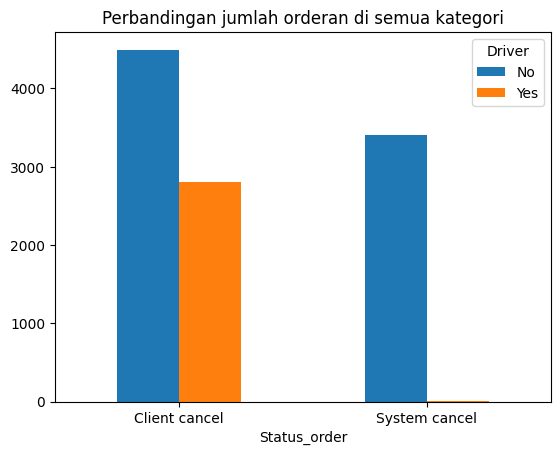

In [15]:
#Rangkuman jumlah orderan cancel menggunakan bar chart
data.pivot_table(index='Status_order', columns='Driver', values='order_gk',aggfunc='count').plot(kind='bar',rot = 0)
plt.title("Perbandingan jumlah orderan di semua kategori")
plt.show()

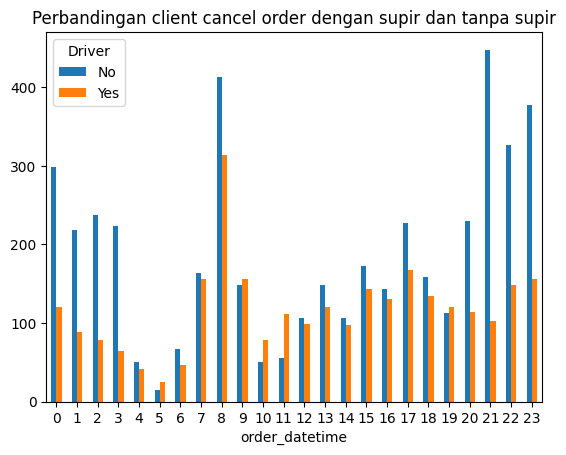

In [16]:
#Membuat perbandingan antara client cancel dengan supir dan tanpa supir berdasarkan jam.
a =data.groupby([data['order_datetime'].dt.hour,'Status_order','Driver'])['order_gk'].agg(['count']).reset_index(drop=False)
a[a['Status_order'] == "Client cancel"].pivot(index = 'order_datetime', columns='Driver', values='count').plot(kind='bar',rot=0)
plt.title("Perbandingan client cancel order dengan supir dan tanpa supir")
plt.show()

1.Perhatikan jam 20,21,22,23,0,1,2 dan 3. Pada jam ini pembatalan orderan tanpa driver melonjak sangat tinggi dibandingkan pembatalan order dengan driver.<Br>
2.Trend pembatalan orderan tanpa driver terlihat tinggi pada malam hari, yaitu dari jam 8 malam sampai jam 3 pagi.<Br>
3.Trend pembatalan orderan dengan driver terlihat tinggi pada jam2 masuk kantor yaitu jam 7 sampai jam 9 dan pada jam2 pulang kantor yaitu pada jam 5.

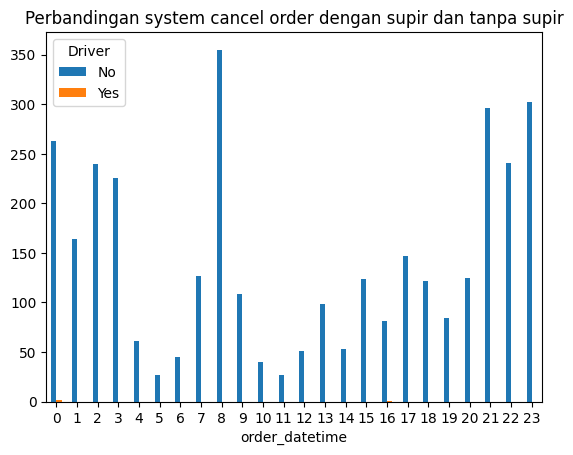

In [17]:
#Membuat perbandingan antara system cancel dengan supir dan tanpa supir berdasarkan jam.
a[a['Status_order'] == "System cancel"].pivot(index = 'order_datetime', columns='Driver', values='count').plot(kind='bar',rot=0)
plt.title("Perbandingan system cancel order dengan supir dan tanpa supir")
plt.show()

Terlihat bahwa order system cancel terbanyak juga pada malam hari (jam 8 malam - 3 pagi), tertinggi ada pada jam 8 pagi, sama seperti client cancel.

In [18]:
#Membuat pivot table untuk membuat plot perbandingan jumlah orderan.
a = a.pivot(index='order_datetime',columns=['Status_order','Driver'], values='count')

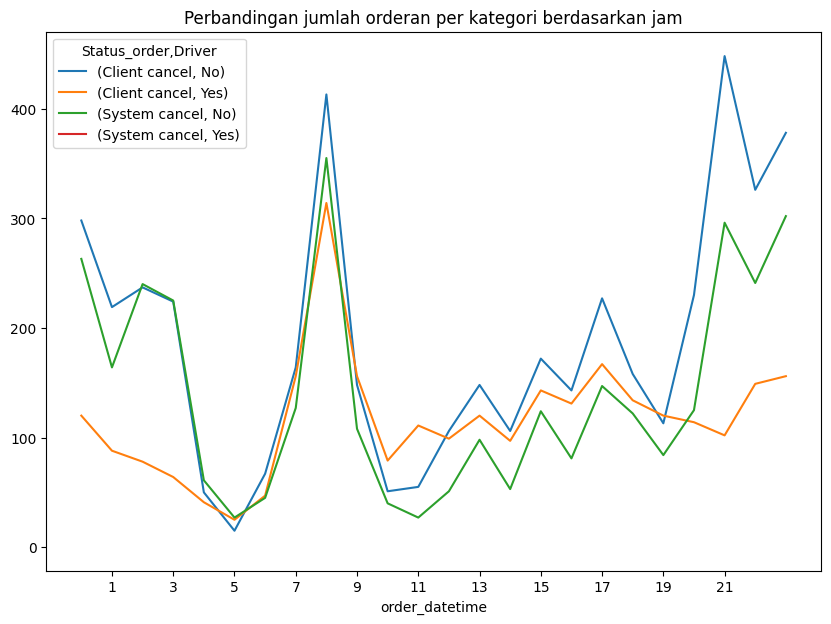

In [19]:
a.plot(kind='line',figsize=(10,7),rot=0,xticks=np.arange(1,23,2))
plt.title("Perbandingan jumlah orderan per kategori berdasarkan jam")
plt.show()

Terlihat bahwa trendline disetiap cancellation order cukup simetris atau sama. Ini membuktikan bahwa semakin tinggi cancellation order dijam tertentu, maka semakin tinggi permintaan orderan.Contoh pada jam 8 pagi, semua kategori cancellation sedang pada tinggi-tingginya, ini berarti pada jam tersebut permintaan orderan dari customer sedang berada di puncak. Dapat dilihat juga bahwa trend pembatalan orderan oleh driver (system cancel)(garis hijau) sangat mirip dengan trend client cancel tanpa supir(garis biru), ini membuktikan bahwa salah satu penyebab client lama mendapatkan orderan adalah dikarenakan banyaknya driver yang melakukan pembatalan orderan.

In [20]:
#Membuat data baru dengan membuang semua outliers per kategori.
a = datacancelnodriver.append(datacancelwithdriver)

C:\Users\verti\AppData\Local\Temp\ipykernel_10568\136396814.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = datacancelnodriver.append(datacancelwithdriver)


In [21]:
#Membuat pivot table untuk divisualisasikan dalam bentuk plot.
a = a.pivot_table(index=a['order_datetime'].dt.hour, columns='Driver',values='cancellations_time_in_seconds',aggfunc='median')

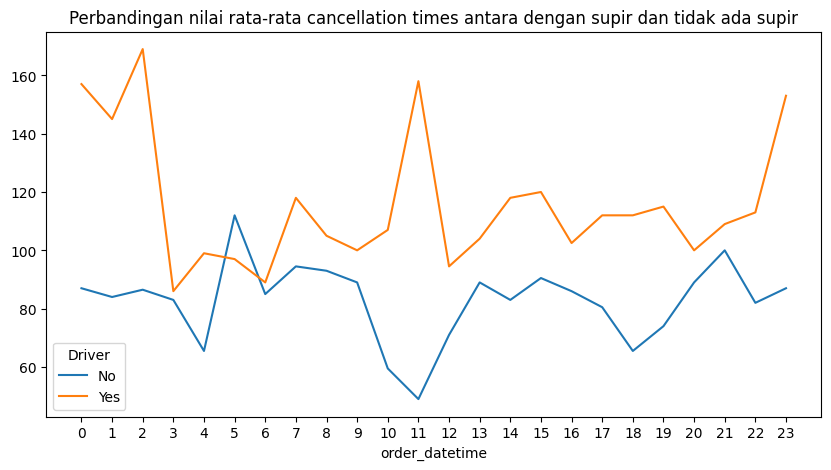

In [22]:
a.plot(kind='line',xticks=np.arange(0,24),figsize=(10,5),rot=0)
plt.title("Perbandingan nilai rata-rata cancellation times antara dengan supir dan tidak ada supir")
plt.show()

1.Trend antara dengan driver dan tanpa driver cukup berbeda.<br>
2.Angka cancellation time dengan driver rata-rata lebih lama dari tanpa driver.<br>
3.Semakin jauh perbedaan cancellation time antara dengan driver dan tanpa driver maka semakin tinggi pula jumlah angka cancellation. Angka cancellation time dengan driver harus dibuat sedekat mungkin dengan angka cancellation time tanpa driver, dengan demikian total angka cancellation keduanya dapat diminimalkan.

In [23]:
#Membuat perbandingan cancellation time dengan ETA.
a = datacancelwithdriver.groupby(by= datacancelwithdriver['order_datetime'].dt.hour)['m_order_eta'].agg('median')
b = datacancelwithdriver.groupby(by= datacancelwithdriver['order_datetime'].dt.hour)['order_gk'].agg('count')

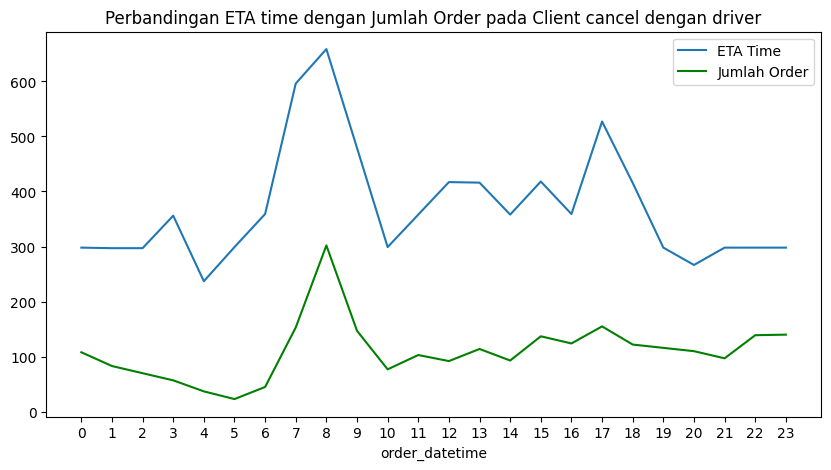

In [24]:
a.plot(kind='line',xticks=np.arange(0,24),figsize=(10,5),subplots=True,layout=(1,1))
b.plot(kind='line',xticks=np.arange(0,24),figsize=(10,5),c='g')
plt.legend(['ETA Time','Jumlah Order'])
plt.title("Perbandingan ETA time dengan Jumlah Order pada Client cancel dengan driver")
plt.show()

Bisa dilihat bahwa pattern kedua garis diatas cukup simetris. Ini artinya semakin tinggi angka ETA driver (jarak driver semakin jauh dari customer) maka semakin tinggi jumlah cancel order dengan driver.

# KESIMPULAN

Sinonim yang akan dipakai :<br>
1.CD = Kategori orderan yang dicancel oleh client yang sudah mendapatkan supir.<Br>
2.CN = Kategori orderan yang dicancel oleh client yang belum mendapatkan supir

## Rangkuman

1.Rata-rata waktu cancellation orderan pada CN adalah 86 detik.<br>
2.Jumlah orderan pada CN adalah 4429 orderan.<br>
3.Rata-rata waktu cancellation orderan pada CD adalah 114 detik.<br>
4.Rata-rata waktu driver tiba (ETA) pada CD adalah 359 detik.<br>
5.Jumlah orderan pada CD adalah 2644 orderan.<br>
6.Jumlah orderan pada system cancel tanpa driver adalah 3406 orderan.<br>
7.Jumlah orderan pada system cancel dengan driver adalah 3 orderan.<br>
8.Jumlah orderan CN tertinggi ada pada malam hari yaitu jam 8 malam sampai jam 3 pagi dan jam 8 pagi.<br>
9.Jumlah orderan CD tertinggi ada pada pagi hari yaitu jam 7 - jam 9 pagi dan pada jam 5 sore.<br>
10.Pola semua jumlah orderan terlihat cukup sama/simetris disetiap jam.<br>
11.Pola rata-rata angka cancellation time antara CN dan CD cukup berbeda (penjelasan lengkap ada diatas).<br>
12.Pola cancellation time dengan ETA pada CD berbanding lurus.

## Key Insights

1.Kurangi jumlah system cancel. Berikan sanksi kepada driver yang melakukan reject. Penyebab orderan CN yang tinggi juga diakibatkan karena terjadi banyak rejectan dari driver(system cancel), ini dapat dibuktikan dengan melihat line chart diatas.<br>
2.Rekrut lebih banyak driver. Berdasarkan data diatas bahwa kategori CN adalah yang tertinggi.<br>
3.Tambah driver pada jam 8 malam - jam 3 pagi dan jam 8 pagi. Pada jam ini jumlah cancel orderan sedang tinggi-tingginya, buatlah insentif lebih kepada drive.<br>
4.CN terjadi dikarenakan waktu menunggu mendapatkan driver yang terlalu lama.<br>
5.CD terjadi dikarenakan waktu menunggu driver yang terlalu lama.<br>
6.Mempertimbangkan bahwa jumlah CN lebih tinggi dari jumlah CD dan waktu cancellation CD yang lebih tinggi dari CN, maka langkah yang bisa diambil adalah menurunkan waktu cancellation CD mendekati waktu cancellation CN. Dengan menurunkan waktu ini, maka jumlah CN akan menurun. Namun jumlah CD juga akan meningkat, tetapi meningkatnya CD tidak akan sejauh penurunan CN (Peluang total pembatalan orderan lebih kecil).<Br>